# Importing Needed packages


In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Reading the data in

In [126]:
df = pd.read_csv('FuelConsumptionCo2.csv',encoding= "ISO-8859-1")

# take a look at the dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [127]:
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [128]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


## Creating train and test dataset

###### X_train: Training features
###### X_test: Testing features
###### y_train: Training labels or target values
###### y_test: Testing labels or target values

In [129]:
X = df.drop('CO2EMISSIONS', axis=1)

y = df['CO2EMISSIONS']

In [130]:
#from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
#train, test = train_test_split(df, test_size=0.2, random_state=42)

Text(0, 0.5, 'Emission')

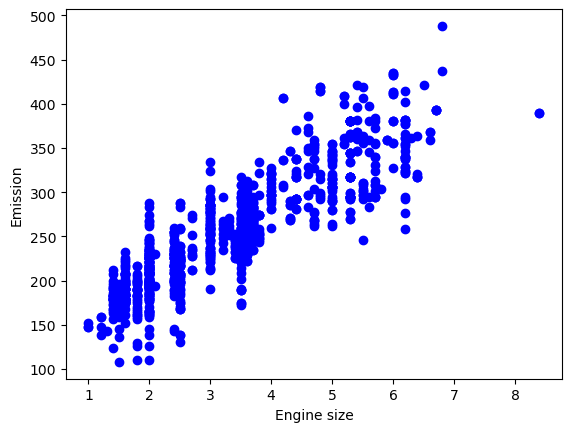

In [131]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [134]:
X_train

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
333,2014,FIAT,500 ABARTH HATCHBACK,MINICOMPACT,1.4,4,M5,X,8.5,6.9,7.8,36
106,2014,BMW,650i xDRIVE CABRIOLET,SUBCOMPACT,4.4,8,A8,Z,15.0,9.8,12.7,22
585,2014,JEEP,GRAND CHEROKEE 4X4 DIESEL,SUV - STANDARD,3.0,6,A8,D,11.2,8.4,9.9,29
55,2014,AUDI,S4,COMPACT,3.0,6,A7,Z,13.2,9.2,11.4,25
213,2014,CHEVROLET,EXPRESS 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,X,18.3,14.2,16.5,17
...,...,...,...,...,...,...,...,...,...,...,...,...
330,2014,DODGE,JOURNEY FFV,SUV - SMALL,3.6,6,A6,X,14.2,9.4,12.0,24
466,2014,GMC,TERRAIN AWD,SUV - SMALL,2.4,4,A6,X,11.5,8.2,10.0,28
121,2014,BMW,M6,COMPACT,4.4,8,M6,Z,16.2,10.9,13.8,20
1044,2014,VOLKSWAGEN,PASSAT,MID-SIZE,1.8,4,M5,X,10.0,6.9,8.6,33


In [135]:
Y_train

98     202
570    242
242    290
82     200
839    283
      ... 
840    260
279    225
111    292
774    207
874    258
Name: CO2EMISSIONS, Length: 853, dtype: int64

In [136]:
X_test

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
732,2014,MERCEDES-BENZ,CL 550 4MATIC,COMPACT,4.7,8,AS7,Z,15.4,10.4,13.2,21
657,2014,LEXUS,ES 350,MID-SIZE,3.5,6,AS6,X,11.3,7.6,9.6,29
168,2014,CADILLAC,CTS SEDAN Vsport,MID-SIZE,3.6,6,AS8,Z,15.1,9.9,12.8,22
86,2014,BMW,335i,COMPACT,3.0,6,A8,Z,11.4,7.3,9.6,29
411,2014,FORD,FUSION,MID-SIZE,2.0,4,AS6,X,10.5,7.1,9.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...
963,2014,SUBARU,XV CROSSTREK AWD,SUV - SMALL,2.0,4,M5,X,10.2,8.0,9.2,31
294,2014,DODGE,AVENGER,MID-SIZE,2.4,4,A6,X,12.0,7.6,10.0,28
275,2014,CHRYSLER,200 CONVERTIBLE,COMPACT,2.4,4,A4,X,11.7,8.2,10.1,28
903,2014,PORSCHE,PANAMERA 4S,FULL-SIZE,3.0,6,AM7,Z,13.4,8.8,11.3,25


In [137]:
y_test

732    304
657    221
168    294
86     221
411    207
      ... 
963    212
294    230
275    232
903    260
941    389
Name: CO2EMISSIONS, Length: 214, dtype: int64

In [138]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

model.fit(train_x, train_y)


LinearRegression()

In [139]:
predictions = model.predict(test_x)
print ('Coefficients: ', model.coef_)

Coefficients:  [[11.2094395   7.15561381  9.5208118 ]]


In [140]:
predictions


array([[302.95237705],
       [240.91489956],
       [272.50244127],
       [235.31017981],
       [204.07702562],
       [245.78307279],
       [304.87320139],
       [283.65078533],
       [309.17145244],
       [307.72944493],
       [287.73574015],
       [391.1248773 ],
       [252.78536659],
       [251.38779254],
       [262.02954829],
       [255.19611726],
       [210.0661428 ],
       [250.60457413],
       [190.07243802],
       [307.77387839],
       [318.69226424],
       [205.64346244],
       [256.59369131],
       [248.86927454],
       [261.96845285],
       [197.07473182],
       [205.0291068 ],
       [186.2641133 ],
       [309.06368511],
       [248.97704187],
       [390.77380382],
       [203.80039551],
       [205.64346244],
       [327.26099486],
       [238.16642335],
       [286.76699699],
       [277.01622698],
       [399.17367168],
       [199.31661972],
       [204.92133946],
       [176.7433015 ],
       [187.21619448],
       [186.87846894],
       [209

In [141]:
Y_test


103     281
869     242
138     253
724     242
1039    212
       ... 
832     253
76      193
995     285
395     161
131     320
Name: CO2EMISSIONS, Length: 214, dtype: int64

In [142]:
model.score(test_x, y_test)

0.8759705206914069

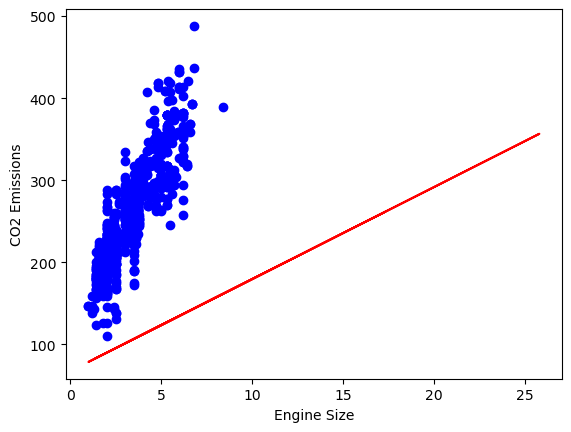

In [145]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c='blue')
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()